In [10]:
from Interval import *
import cv2
from sympy.geometry import Line

In [3]:
class Robot(Interval):
    radius = 30
    bot_color = 'r'
    color = 'red'
    Δt = 1
    
    def __init__(self,x_bot,y_bot,yaw,*args):
        
        self.x_bot = x_bot
        self.y_bot = y_bot
        self.yaw = yaw
        if len(args)==4:
            vi,vj,wi,wj = args
            self.theta1 = yaw
            self.theta2 = yaw + (wi - wj)*self.Δt
            self.origin = (x_bot+self.radius*(np.cos(self.theta1)+np.cos(self.theta2))/(1e-6 + np.sin(self.theta1-self.theta2)),
                           y_bot+self.radius*(np.sin(self.theta1)+np.sin(self.theta2))/(1e-6 + np.sin(self.theta1-self.theta2)))
            self.r1 = 0
            self.r2 = (vi-vj)*self.Δt
            n = self.radius/np.sin(1e-6+(self.theta2-self.theta1)/2)
            self.nu1 = n - self.radius
            self.nu2 = n + self.radius + self.r2
            super(Robot,self).__init__(self.nu1,self.nu2,self.theta1,self.theta2,self.origin)
                       
    
    def plot(self,ax):
        bot_circle = plt.Circle( (self.x_bot, self.y_bot),self.radius,color=self.bot_color)
        arrow = ax.arrow(self.x_bot,self.y_bot,self.radius*np.cos(self.yaw),self.radius*np.sin(self.yaw))
        patch = ax.add_patch(bot_circle)
        return [bot_circle,arrow]
                           
    def plot_interval(self,ax):
        return super(Robot,self).draw(ax,self.color)

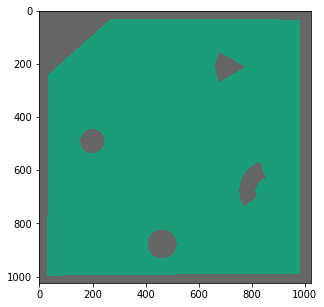

In [4]:
arena = cv2.imread("arena1.png")
arena = (1-cv2.cvtColor(arena,cv2.COLOR_RGB2GRAY)/255).astype('int')
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2)

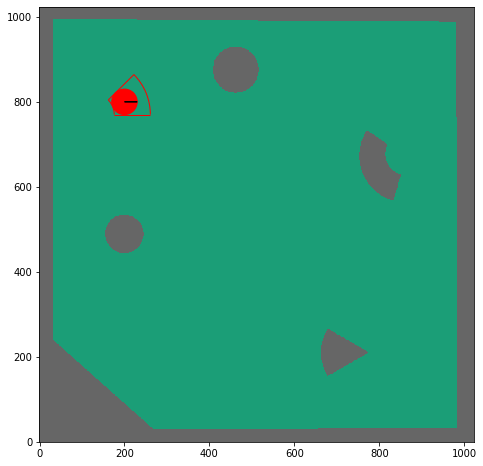

In [25]:
robot = Robot(200,800,0,5,-20,0,-0.78)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(arena,cmap = plt.cm.Dark2,origin = 'lower')
robot.plot(ax)
robot.plot_interval(ax)

In [5]:
arena_c = cv2.imread("arenap.png")


In [6]:
entities = [[],[],[],[],[],[]]
points = {
    (255,0,0) : 0,
    (0,255,0) : 1,
    (0,0,255) : 2,
    (128,128,0)  : 3,
    (128,0,128) : 4,
    (0,128,128) : 5 
}

for i in range(len(arena_c)):
    for j in range(len(arena_c)):
        try:
            entities[int(points[tuple(arena_c[i,j])])].append((i,j))
        except KeyError:
            pass


print(entities)        
        

[[(820, 463), (875, 409), (876, 518), (930, 463)], [(443, 200), (489, 246), (490, 155), (535, 200)], [(155, 679), (210, 776), (267, 679)], [(29, 270), (240, 34)], [(568, 834), (629, 852), (700, 821), (734, 771)], [(33, 983), (988, 981), (995, 32)]]


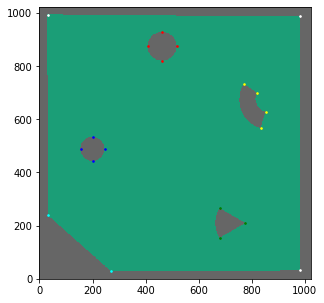

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
colors = {
    0:"red",
    1:"blue",
    2:"green",
    3:"cyan",
    4: "yellow",
    5: "white"
}
for i in range(6):
    for point in entities[i]:
        ax.scatter(point[1],point[0], marker = ".", color = colors[i], s = 10)

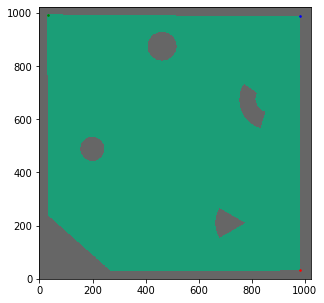

In [8]:

fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
i = 0
for point in entities[5]:
        ax.scatter(point[1],point[0], marker = ".", color = colors[i], s = 10)
        i+=1
       
      

radius = 54.751146764861105, center = (463.0, 875.5)


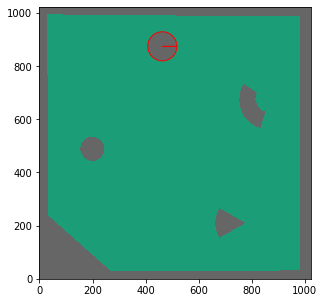

In [99]:

fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
circle = entities[0]
r1 = np.linalg.norm(np.array(circle[1])-np.array(circle[2]))
r2 = np.linalg.norm(np.array(circle[0])-np.array(circle[3]))
r = (r1+r2)/4
center = ((circle[3][1]+circle[0][1])/2,(circle[2][0]+circle[1][0])/2)
circle1 = Interval(0,r,0,6.2831,center)
circle1.draw(ax,'red')
print(f"radius = {r}, center = {center}")

radius = 45.751373584906915, center = (200.0, 489.5)


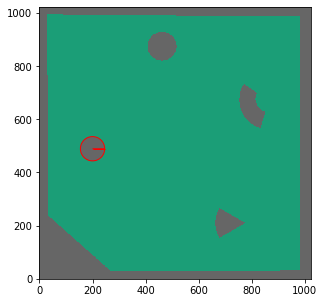

In [100]:

fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
circle = entities[1]
r1 = np.linalg.norm(np.array(circle[1])-np.array(circle[2]))
r2 = np.linalg.norm(np.array(circle[0])-np.array(circle[3]))
r = (r1+r2)/4
center = ((circle[3][1]+circle[0][1])/2,(circle[2][0]+circle[1][0])/2)
circle1 = Interval(0,r,0,6.2831,center)
circle1.draw(ax,'red')
print(f"radius = {r}, center = {center}")

radius = 112.00781238321308, theta1 = 2.6257835681132704,theta2 = 3.6728660674316074 center = (776, 210)


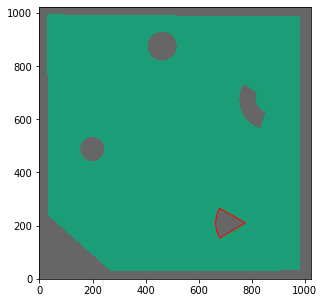

In [117]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = entities[2]
r1 = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))
r2 = np.linalg.norm(np.array(sector[1])-np.array(sector[2]))
r = (r1+r2)/2
center = sector[1][::-1]
xp1,yp1 = np.array(sector[1])-np.array(sector[2])
theta1 = np.arctan2(yp1,xp1) if yp1>=0 else 2*np.pi + np.arctan2(yp1,xp1)
xp2,yp2 = np.array(sector[0])-np.array(sector[1])
theta2 = np.arctan2(yp2,xp2) if yp2>=0 else 2*np.pi + np.arctan2(yp2,xp2)

circle1 = Interval(0,r,theta1+np.pi/2,theta2-np.pi/2,center)
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

radius = 316.5706872090339, theta1 = 2.412064696573217,theta2 = 2.412064696573217 center = (29, 270)


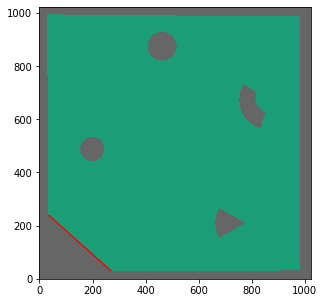

In [170]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = entities[3]
r = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))

center = sector[0] #[::-1]

line1 = Line(sector[0],sector[1])

line3 = Line(center,(center[0]+2,center[1]))
theta1 = float(line1.angle_between(line3))
circle1 = Interval(0,r,np.pi/2+theta1,np.pi/2+theta1,center[::-1])
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

0.973619668702219
r1 = 47.83718524347152, r2 = 109.86977539144914, theta1 = 2.5444159954971157,theta2 = 4.42545022745392 center = (864.2687056253413, 670.5772801747679)


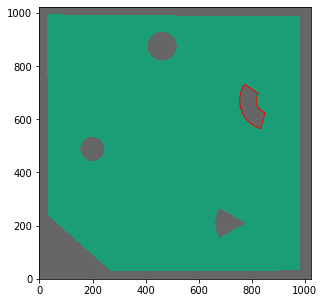

In [166]:

fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
asector = entities[4]
line1 = Line(asector[0],asector[1])
line2 = Line(asector[2],asector[3])

center = intersection(line1,line2)[0]
line3 = Line(center,(center.x+2,center.y))
theta1 = float(line2.angle_between(line3))
theta2 = float(line1.angle_between(line3))
sector = [asector[0],(float(center.x),float(center.y)),asector[3]]
r1 = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))
r2 = np.linalg.norm(np.array(sector[1])-np.array(sector[2]))
r = (r1+r2)/2
r11 = np.linalg.norm(np.array(asector[1])-np.array(sector[1]))
r22 = np.linalg.norm(np.array(asector[2])-np.array(sector[1]))
ra = (r11+r22)/2
center = sector[1][::-1]

print((theta1))

circle1 = Interval(ra,r,theta1+np.pi/2,3*np.pi/2-theta2,center)
circle1.draw(ax,'red')
print(f"r1 = {ra}, r2 = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

radius = 713.0112201080709, theta1 = -0.005610039321912508,theta2 = -0.005610039321912508 center = (29, 270)


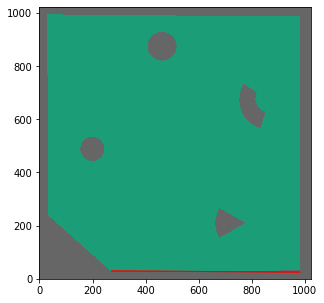

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = [(29,270),entities[5][0]]
r = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))

center = sector[0] #[::-1]

line1 = Line(sector[0],sector[1])

line3 = Line(center,(center[0]+2,center[1]))
theta1 = float(line1.angle_between(line3))
circle1 = Interval(0,r,0-np.pi/2+theta1,0-np.pi/2+theta1,center[::-1])
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

radius = 955.0020942385414, theta1 = 1.5728905645709292,theta2 = 1.5728905645709292 center = (33, 983)


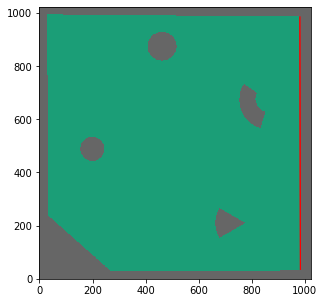

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = [entities[5][0],entities[5][1]]
r = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))

center = sector[0] #[::-1]

line1 = Line(sector[0],sector[1])

line3 = Line(center,(center[0]+2,center[1]))
theta1 = float(line1.angle_between(line3))
circle1 = Interval(0,r,np.pi/2+theta1,np.pi/2+theta1,center[::-1])
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

radius = 949.0258162979551, theta1 = 3.134216601901824,theta2 = 3.134216601901824 center = (988, 981)


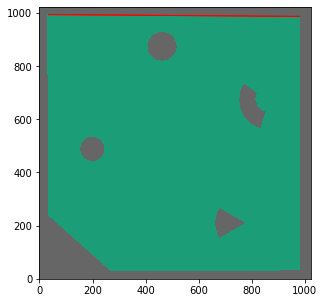

In [20]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = [entities[5][1],entities[5][2]]
r = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))

center = sector[0] #[::-1]

line1 = Line(sector[0],sector[1])

line3 = Line(center,(center[0]+2,center[1]))
theta1 = float(line1.angle_between(line3))
circle1 = Interval(0,r,np.pi/2+theta1,np.pi/2+theta1,center[::-1])
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

radius = 755.0026490019753, theta1 = 4.709739979958382,theta2 = 4.709739979958382 center = (995, 32)


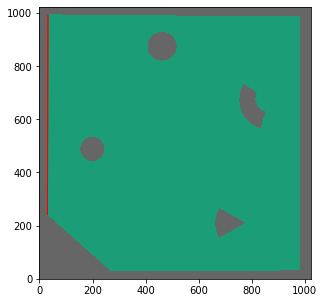

In [25]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
sector = [entities[5][2],entities[3][1]]
r = np.linalg.norm(np.array(sector[0])-np.array(sector[1]))

center = sector[0] #[::-1]

line1 = Line(sector[0],sector[1])

line3 = Line(center,(center[0]+2,center[1]))
theta1 = float(line1.angle_between(line3))
circle1 = Interval(0,r,np.pi/2+theta1,np.pi/2+theta1,center[::-1])
circle1.draw(ax,'red')
print(f"radius = {r}, theta1 = {circle1.theta1},theta2 = {circle1.theta2} center = {center}")

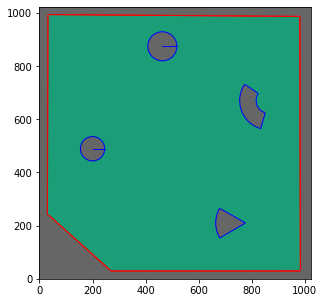

In [26]:
circle1 = Interval(0,45.751373584906915,0,6.283185307, (200.0, 489.5))
circle2 = Interval(0,54.751146764861105, 0,6.283185307, (463.0, 875.5))
sector = Interval(0,112.00781238321308, 2.6257835681132704,3.6728660674316074,(776, 210))
asector = Interval(47.83718524347152,109.86977539144914,2.5444159954971157,4.42545022745392,(864.2687056253413, 670.5772801747679))
wall1 = Interval(0,316.5706872090339,2.412064696573217,2.412064696573217,(270,29))
wall2 = Interval(0,713.0112201080709,0.00,0.00,(270,29))
wall3 = Interval(0,955.0020942385414,1.5728905645709292,1.5728905645709292,(983,33))
wall4 = Interval(0,949.0258162979551,3.134216601901824,3.134216601901824,(981,988))
wall5 = Interval(0,755.0026490019753,4.709739979958382,4.709739979958382,(32,995))
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
circle1.draw(ax,'blue')
circle2.draw(ax,'blue')
sector.draw(ax,'blue')
asector.draw(ax,'blue')
wall1.draw(ax,'red')
wall2.draw(ax,'red')
wall3.draw(ax,'red')
wall4.draw(ax,'red')
wall5.draw(ax,'red')


In [32]:
json_string = '''
{
    "obstacles" : [
        {
        "name":"circle1",
        "params":[0,45.751373584906915,0,6.283185307],
        "center":[200.0, 489.5]
        },
        {
        "name":"circle2",
        "params":[0,54.751146764861105, 0,6.283185307],
        "center":[463.0, 875.5]
        },
        {
        "name":"sector",
        "params":[0,112.00781238321308, 2.6257835681132704,3.6728660674316074],
        "center":[776, 210]
        },
        {
        "name":"asector",
        "params":[47.83718524347152,109.86977539144914,2.5444159954971157,4.42545022745392],
        "center":[864.2687056253413, 670.5772801747679]
        },
        {
        "name":"wall1",
        "params":[0,316.5706872090339,2.412064696573217,2.412064696573217],
        "center":[270,29]
        },
        {
        "name":"wall2",
        "params":[0,713.0112201080709,0.00,0.00],
        "center":[270,29]
        },
        {
        "name":"wall3",
        "params":[0,955.0020942385414,1.5728905645709292,1.5728905645709292],
        "center":[983,33]
        },
        {
        "name":"wall4",
        "params":[0,949.0258162979551,3.134216601901824,3.134216601901824],
        "center":[981,988]
        },
        {
        "name":"wall5",
        "params":[0,755.0026490019753,4.709739979958382,4.709739979958382],
        "center":[32,995]
        }  
    ]
}    
'''

In [27]:
import json

In [37]:
with open('obstacles.json') as f:   
    data = json.load(f)
obstacles = []
for obstacle in data['obstacles']:
    params,center = obstacle['params'],obstacle['center']
    obstacles.append(Interval(*params,center))   

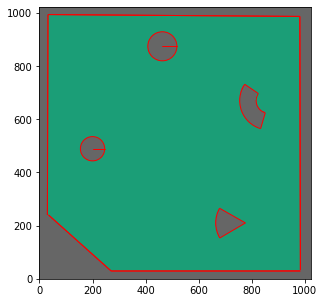

In [38]:
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.Dark2,origin='lower')
for obstacle in obstacles:
    obstacle.draw(ax,'red')

In [127]:
center[0].y


1582476/1831

In [53]:
aa = (23,23)
print(*aa)

23 23
